https://www.kaggle.com/competitions/competitive-data-science-predict-future-sales/data?select=sales_train.csv

In [1]:
%pip install neuralprophet
%pip install matplotlib
%pip install pandas
%pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline

from neuralprophet import NeuralProphet
import pandas as pd
import logging
import warnings

logging.getLogger('prophet').setLevel(logging.ERROR)
logging.getLogger('numexpr').setLevel(logging.ERROR)
logging.getLogger("cmdstanpy").disabled=True
warnings.filterwarnings("ignore")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


## Read the sales data into a dataframe

In [3]:
sales_df = pd.read_csv('data/dataset/sales_train.csv')
sales_df['date'] = pd.to_datetime(sales_df['date'], format='mixed')

## Drop excess columns

In [4]:
# drop item_price and item_cnt_day
# sales_df = sales_df.drop(columns=['item_price', 'date_block_num'])

## Read Items and Categories 

In [5]:
# read item categories and items
items_df = pd.read_csv('data/dataset/items.csv')
categories_df = pd.read_csv('data/dataset/item_categories.csv')

## Join Items to Categories

In [6]:
# merge item categories and items
items_df = pd.merge(items_df, categories_df, on='item_category_id')

## Join Sales and Items

In [7]:
# combine sales and items
sales_df = pd.merge(sales_df, items_df, on='item_id')
sales_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name
0,2013-02-01,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,2013-03-01,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
2,2013-05-01,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
3,2013-06-01,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил
4,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства


In [8]:
# rename item_category_id to category
sales_df = sales_df.rename(columns={'item_category_id': 'category'})


# Drop Extra Columns

In [9]:
# Drop columns
sales_df = sales_df.drop(columns=['item_category_name', 'item_name', 'date_block_num', 'item_price'])

In [10]:
sales_df.head()

# # write csv file to disk
# sales_df.to_csv('data/dataset/sales_processed.csv', index=False)

,date,shop_id,item_id,item_cnt_day,category
0,2013-02-01,59,22154,1.0,37
1,2013-03-01,25,2552,1.0,58
2,2013-05-01,25,2552,-1.0,58
3,2013-06-01,25,2554,1.0,58
4,2013-01-15,25,2555,1.0,56


In [11]:
# Map shop_id from 1 to 10 to 0, 11 to 50 to 1, and 51 to 60 to 2
sales_df.loc[sales_df['shop_id'].between(1, 10), 'shop_id'] = 0
sales_df.loc[sales_df['shop_id'].between(11, 50), 'shop_id'] = 1
sales_df.loc[sales_df['shop_id'].between(51, 60), 'shop_id'] = 2
sales_df['shop_id'].unique()

array([2, 1, 0])

# Group the sales by Channel / store_id and date

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.839% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 110


Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (33) is too small than the required number                     for the learning rate finder (226). The results might not be optimal.
Finding best initial lr: 100%|██████████| 226/226 [00:01<00:00, 146.30it/s]


Training: |          | 0/? [00:22<?, ?it/s, v_num=61, train_loss=0.0578, reg_loss=0.000, MAE=108.0, RMSE=198.0, Loss=0.0567, RegLoss=0.000]


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.839% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.142% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.142% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.data.processing._handle_missing_data) - Dropped 365 rows at the end with NaNs in 'y' column.


Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 31.57it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


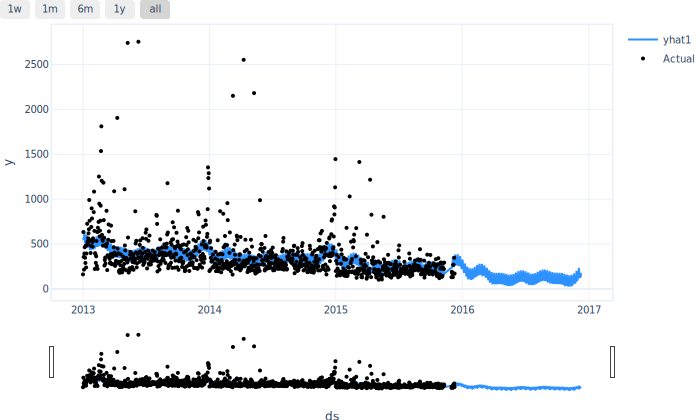

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.839% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 110


Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (33) is too small than the required number                     for the learning rate finder (226). The results might not be optimal.
Finding best initial lr: 100%|██████████| 226/226 [00:01<00:00, 151.92it/s]


Training: |          | 0/? [00:22<?, ?it/s, v_num=62, train_loss=0.0551, reg_loss=0.000, MAE=549.0, RMSE=819.0, Loss=0.0543, RegLoss=0.000]  

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.839% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.142% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.142% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.data.processing._handle_missing_data) - Dropped 365 rows at the end with NaNs in 'y' column.



Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 234.38it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


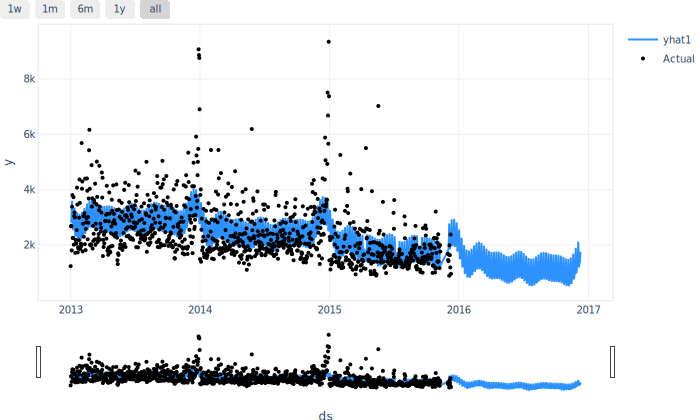

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.839% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 110


Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (33) is too small than the required number                     for the learning rate finder (226). The results might not be optimal.
Finding best initial lr: 100%|██████████| 226/226 [00:01<00:00, 155.66it/s]


Training: |          | 0/? [00:22<?, ?it/s, v_num=63, train_loss=0.0488, reg_loss=0.000, MAE=185.0, RMSE=278.0, Loss=0.0481, RegLoss=0.000]  

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.839% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.142% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.142% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.data.processing._handle_missing_data) - Dropped 365 rows at the end with NaNs in 'y' column.



Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 294.61it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


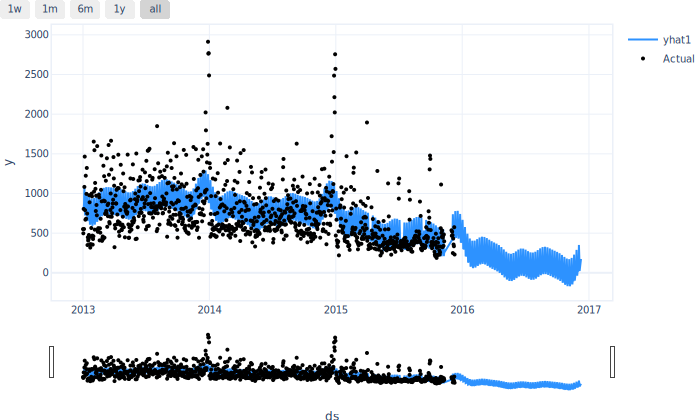

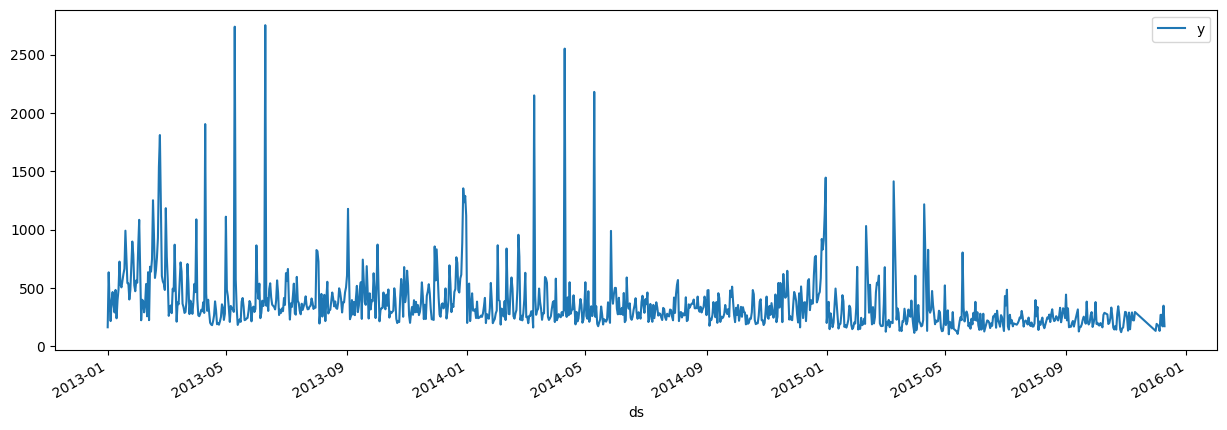

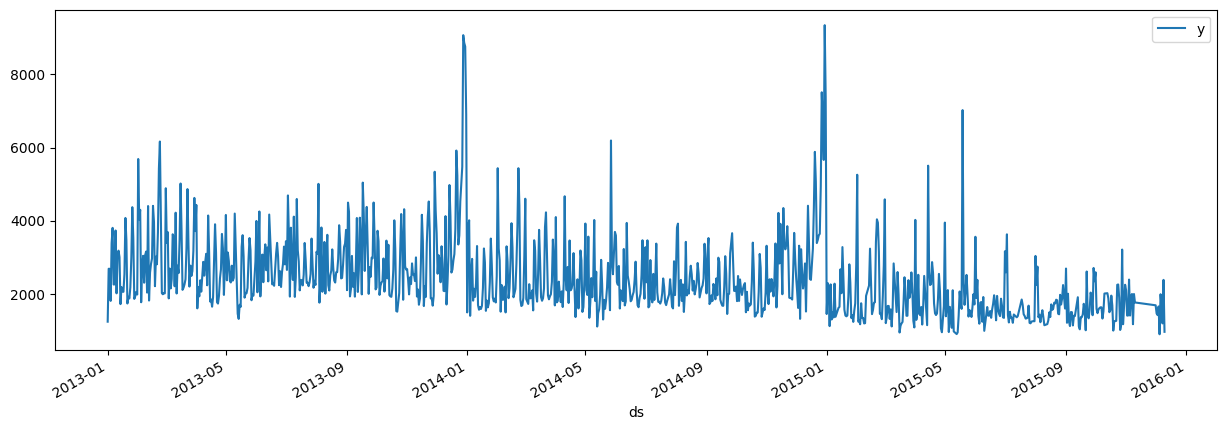

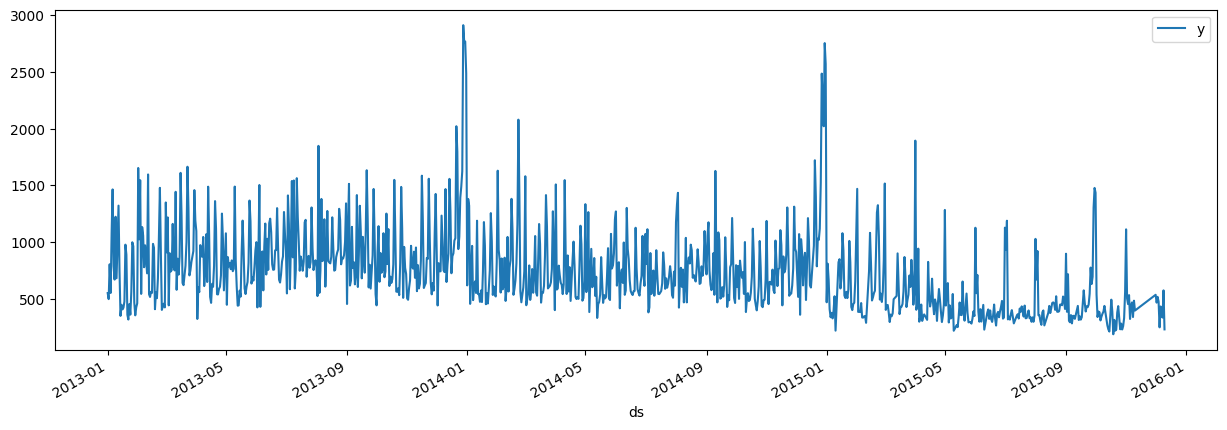

In [13]:
# Group the sales by date and category and sum up the sales from item_cnt_day column
sales_channel_df = sales_df.groupby(['date', 'shop_id'])['item_cnt_day'].sum().reset_index()

# Build prophet models for each channel
models = {}

for channel in sales_channel_df['shop_id'].unique():
    channel_df = sales_channel_df[sales_channel_df['shop_id'] == channel]
    # rename date to ds and item_cnt_day to y
    channel_df = channel_df.rename(columns={'date': 'ds', 'item_cnt_day': 'y'})
    channel_df = channel_df[['ds', 'y']]

    plt = channel_df.plot(x="ds", y="y", figsize=(15, 5))
    plt.set_title(f"Channel {channel}")
    plt.set_xlabel("Date")
    plt.set_ylabel("Sales")
    plt.show()
    
    # drop rows with negative values in y
    channel_df = channel_df[channel_df['y'] >= 0]
    channel_df = channel_df.sort_values('ds')
    
    # Check if the dataframe has at least 2 non-NaN rows
    if channel_df.dropna().shape[0] < 2:
        continue
    
    model = NeuralProphet()
    model.set_plotting_backend("plotly-static")
    model.fit(channel_df)
    future = model.make_future_dataframe(channel_df, n_historic_predictions=True, periods=365)
    forecast = model.predict(future)
  
    models[channel] = (model, forecast)

    # Label the plot with the category
    model.plot(forecast)